In [1]:
import pandas as pd
import shap
import joblib
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("churn_cleaned.csv")

In [3]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
xgb = joblib.load("models/xgboost_churn_model.pkl")

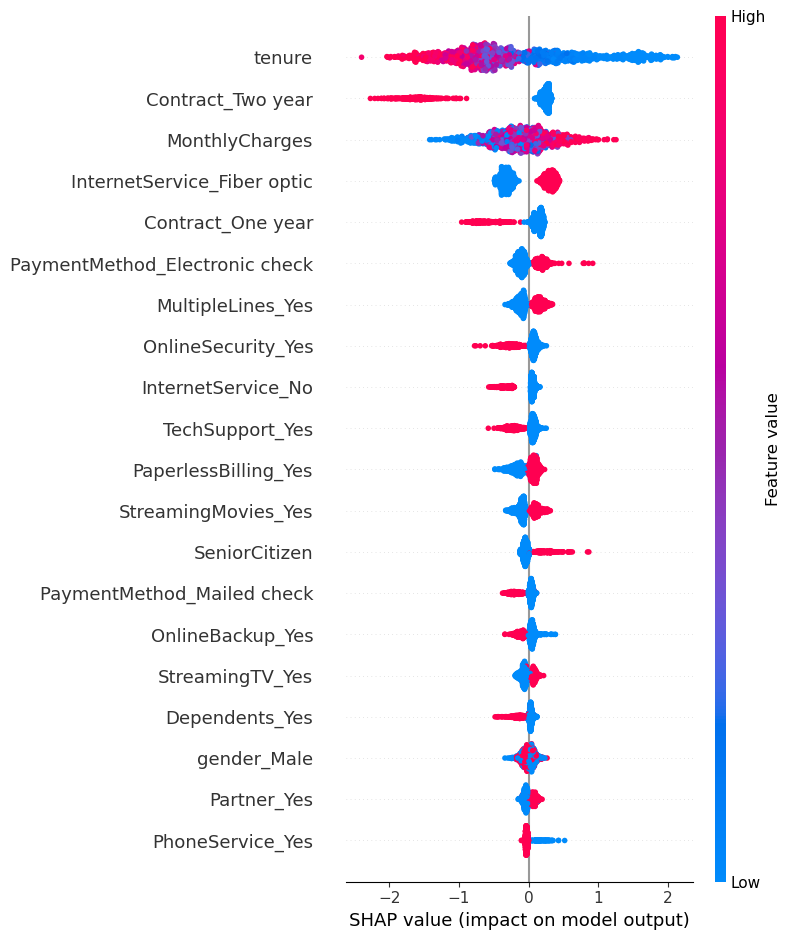

In [6]:
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

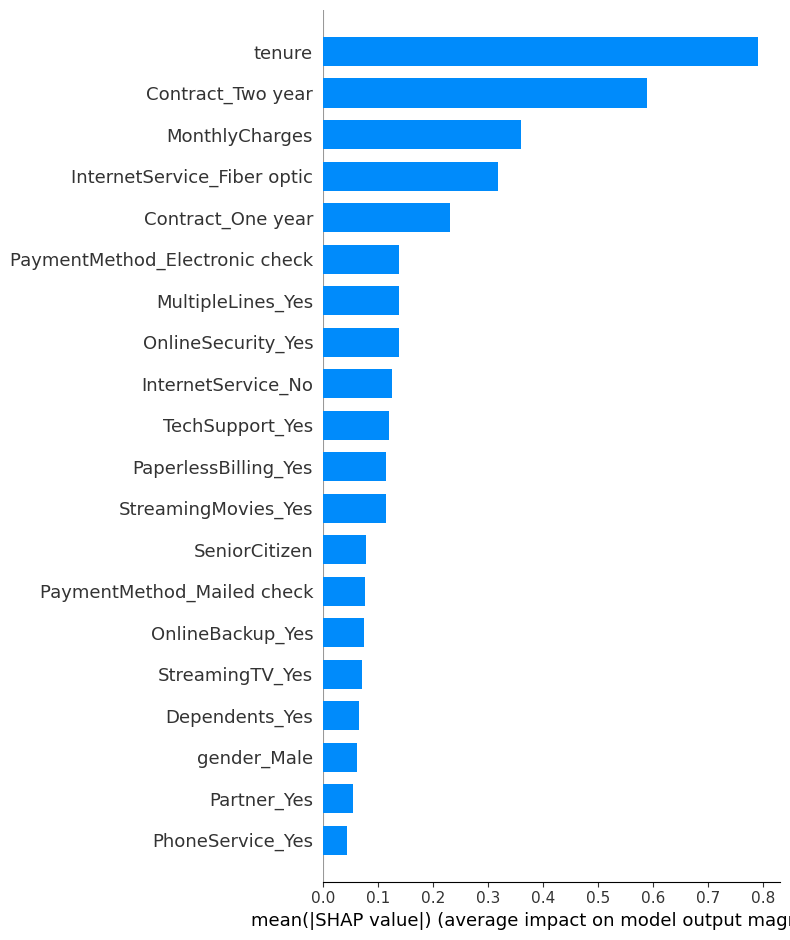

In [7]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

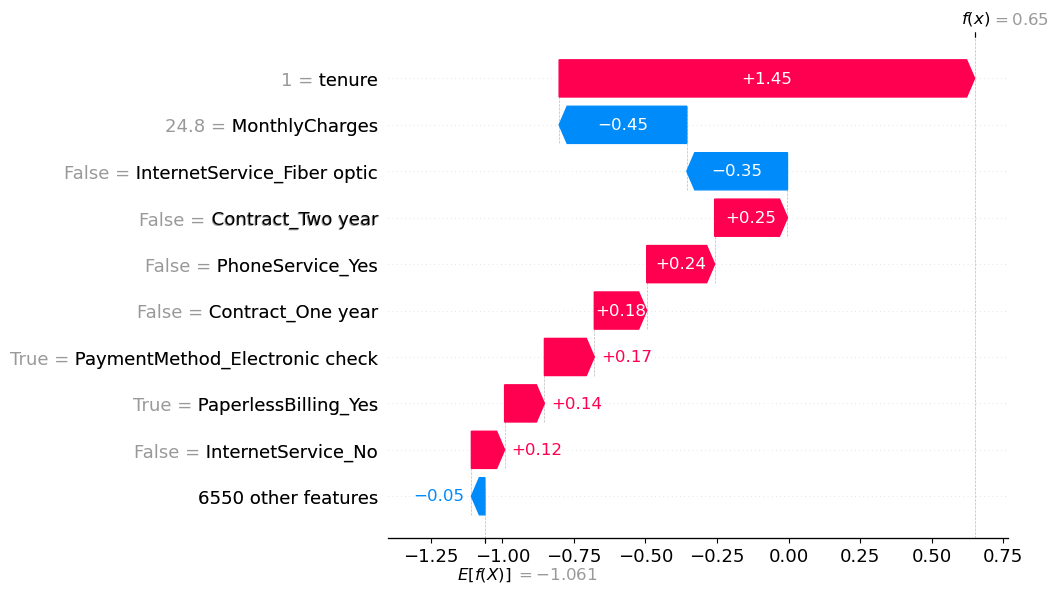

In [8]:
shap.plots.waterfall(shap_values[0])